In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from sklearn import linear_model
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# International Football Results from 1872 to 2022
link1 = 'https://www.kaggle.com/datasets/martj42/international-football-results-from-1872-to-2017?select=results.csv'
results = pd.read_csv('results.csv')
results =  results.replace({'Germany DR': 'Germany', 'China': 'China PR'})
results['date'] = pd.to_datetime(results['date'])

FileNotFoundError: ignored

In [ ]:
results

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
44147,2022-12-01,Canada,Morocco,NaN,NaN,FIFA World Cup,Doha,Qatar,True
44148,2022-12-02,Serbia,Switzerland,NaN,NaN,FIFA World Cup,Doha,Qatar,True
44149,2022-12-02,Cameroon,Brazil,NaN,NaN,FIFA World Cup,Lusail,Qatar,True
44150,2022-12-02,Ghana,Uruguay,NaN,NaN,FIFA World Cup,Al Wakrah,Qatar,True


In [ ]:
# FIFA World Ranking 1992 to 2022
link2 = 'https://www.kaggle.com/datasets/cashncarry/fifaworldranking'
worldrankings = pd.read_csv('fifa_ranking-2022-10-06.csv')
worldrankings['rank_date'] = pd.to_datetime(worldrankings['rank_date'])

In [ ]:
worldrankings

,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation,rank_date
0,1,Germany,GER,57.00,0.00,0,UEFA,1992-12-31
1,96,Syria,SYR,11.00,0.00,0,AFC,1992-12-31
2,97,Burkina Faso,BFA,11.00,0.00,0,CAF,1992-12-31
3,99,Latvia,LVA,10.00,0.00,0,UEFA,1992-12-31
4,100,Burundi,BDI,10.00,0.00,0,CAF,1992-12-31
...,...,...,...,...,...,...,...,...
63911,74,El Salvador,SLV,1330.51,1333.48,3,CONCACAF,2022-10-06
63912,75,Oman,OMA,1320.29,1323.03,0,AFC,2022-10-06
63913,76,Israel,ISR,1316.55,1316.35,0,UEFA,2022-10-06
63914,78,Georgia,GEO,1307.34,1296.46,-4,UEFA,2022-10-06


In [ ]:
rankings = worldrankings.set_index(['rank_date']).groupby(['country_full'], group_keys=False).resample('D').first().fillna(method='ffill')
rankings = rankings.reset_index()
rankings

,rank_date,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation
0,2003-01-15,204.0,Afghanistan,AFG,7.00,0.00,0.0,AFC
1,2003-01-16,204.0,Afghanistan,AFG,7.00,0.00,0.0,AFC
2,2003-01-17,204.0,Afghanistan,AFG,7.00,0.00,0.0,AFC
3,2003-01-18,204.0,Afghanistan,AFG,7.00,0.00,0.0,AFC
4,2003-01-19,204.0,Afghanistan,AFG,7.00,0.00,0.0,AFC
...,...,...,...,...,...,...,...,...
2186614,2022-10-02,123.0,Zimbabwe,ZIM,1138.56,1138.56,0.0,CAF
2186615,2022-10-03,123.0,Zimbabwe,ZIM,1138.56,1138.56,0.0,CAF
2186616,2022-10-04,123.0,Zimbabwe,ZIM,1138.56,1138.56,0.0,CAF
2186617,2022-10-05,123.0,Zimbabwe,ZIM,1138.56,1138.56,0.0,CAF


In [ ]:
# merged to include home team stats
matcheshome = results.merge(rankings, 
                        left_on=['date', 'home_team'], 
                        right_on=['rank_date', 'country_full'])

In [ ]:
#matcheshome

In [ ]:
# merged to include away team stats 
matchesaway = results.merge(rankings, 
                        left_on=['date', 'away_team'], 
                        right_on=['rank_date', 'country_full'])

In [ ]:
#matchesaway

In [ ]:
allmatchstats = matcheshome.merge(rankings, 
                        left_on=['date', 'away_team'], 
                        right_on=['rank_date', 'country_full'], 
                        suffixes=('_home', '_away'))

In [ ]:
allmatchstats

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,rank_date_home,...,rank_change_home,confederation_home,rank_date_away,rank_away,country_full_away,country_abrv_away,total_points_away,previous_points_away,rank_change_away,confederation_away
0,1993-01-01,Ghana,Mali,1.0,1.0,Friendly,Libreville,Gabon,True,1993-01-01,...,0.0,CAF,1993-01-01,69.0,Mali,MLI,22.00,0.00,0.0,CAF
1,1993-01-02,Gabon,Burkina Faso,1.0,1.0,Friendly,Libreville,Gabon,False,1993-01-02,...,0.0,CAF,1993-01-02,97.0,Burkina Faso,BFA,11.00,0.00,0.0,CAF
2,1993-01-03,Burkina Faso,Mali,1.0,0.0,Friendly,Libreville,Gabon,True,1993-01-03,...,0.0,CAF,1993-01-03,69.0,Mali,MLI,22.00,0.00,0.0,CAF
3,1993-01-03,Gabon,Ghana,2.0,3.0,Friendly,Libreville,Gabon,False,1993-01-03,...,0.0,CAF,1993-01-03,39.0,Ghana,GHA,34.00,0.00,0.0,CAF
4,1993-01-08,Uganda,Tanzania,3.0,1.0,Friendly,Kampala,Uganda,False,1993-01-08,...,0.0,CAF,1993-01-08,80.0,Tanzania,TAN,15.00,0.00,0.0,CAF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21431,2022-09-27,Norway,Serbia,0.0,2.0,UEFA Nations League,Oslo,Norway,False,2022-09-27,...,0.0,UEFA,2022-09-27,25.0,Serbia,SRB,1549.53,1549.53,0.0,UEFA
21432,2022-09-27,Sweden,Slovenia,1.0,1.0,UEFA Nations League,Stockholm,Sweden,False,2022-09-27,...,0.0,UEFA,2022-09-27,65.0,Slovenia,SVN,1372.48,1372.48,0.0,UEFA
21433,2022-09-27,Kosovo,Cyprus,5.0,1.0,UEFA Nations League,Pristina,Kosovo,False,2022-09-27,...,0.0,UEFA,2022-09-27,108.0,Cyprus,CYP,1180.52,1180.52,1.0,UEFA
21434,2022-09-27,Greece,Northern Ireland,3.0,1.0,UEFA Nations League,Athens,Greece,False,2022-09-27,...,1.0,UEFA,2022-09-27,58.0,Northern Ireland,NIR,1399.10,1399.10,0.0,UEFA


In [ ]:
# calculated stats 
calculatedstats = pd.DataFrame([])
calculatedstats['date'] = allmatchstats['date']
calculatedstats['home_team'] = allmatchstats['home_team']
calculatedstats['away_team'] = allmatchstats['away_team']
calculatedstats['rank_difference'] = allmatchstats['rank_home'] - allmatchstats['rank_away']
calculatedstats['rank_avg'] = (allmatchstats['rank_home'] + allmatchstats['rank_home']) / 2
calculatedstats['home_score_diff'] = allmatchstats['home_score'] - allmatchstats['away_score']
calculatedstats['point_diff']  = allmatchstats['total_points_home'] - allmatchstats['total_points_away']

result = []
home_score_diff = calculatedstats['home_score_diff'].values 

calculatedstats['home_result'] = home_score_diff > 0
calculatedstats['home_result'] = calculatedstats['home_result'].map(str)


for ele in home_score_diff:
    if ele < 0: 
        calculatedstats['home_result'] = calculatedstats['home_result'].replace('False','Loss')
    #if ele == 0: 
        #calculatedstats['home_result'] = calculatedstats['home_result'].replace('False','Draw')
    if ele > 0: 
        calculatedstats['home_result'] = calculatedstats['home_result'].replace('True','Win')

calculatedstats['is_worldcup'] = allmatchstats['tournament'] != 'Friendly'       



In [ ]:
calculatedstats 

,date,home_team,away_team,rank_difference,rank_avg,home_score_diff,point_diff,home_result,is_worldcup
0,1993-01-01,Ghana,Mali,-30.0,39.0,0.0,12.00,Loss,False
1,1993-01-02,Gabon,Burkina Faso,-42.0,55.0,0.0,16.00,Loss,False
2,1993-01-03,Burkina Faso,Mali,28.0,97.0,1.0,-11.00,Win,False
3,1993-01-03,Gabon,Ghana,16.0,55.0,-1.0,-7.00,Loss,False
4,1993-01-08,Uganda,Tanzania,12.0,92.0,2.0,-3.00,Win,False
...,...,...,...,...,...,...,...,...,...
21431,2022-09-27,Norway,Serbia,11.0,36.0,-2.0,-60.96,Loss,True
21432,2022-09-27,Sweden,Slovenia,-45.0,20.0,0.0,190.96,Loss,True
21433,2022-09-27,Kosovo,Cyprus,-2.0,106.0,4.0,3.38,Win,True
21434,2022-09-27,Greece,Northern Ireland,-9.0,49.0,2.0,42.35,Win,True


In [ ]:
w_l_outcomemask = calculatedstats['home_score_diff'] != 0
w_l_outcome = calculatedstats[w_l_outcomemask]
w_l_outcome['home_result_TF'] = w_l_outcome['home_result'] == 'Win'
w_l_outcome

/var/folders/xj/3xy_v_w504s32_3225pgf8zm0000gn/T/ipykernel_73024/348631761.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  w_l_outcome['home_result_TF'] = w_l_outcome['home_result'] == 'Win'


,date,home_team,away_team,rank_difference,rank_avg,home_score_diff,point_diff,home_result,is_worldcup,home_result_TF
2,1993-01-03,Burkina Faso,Mali,28.0,97.0,1.0,-11.00,Win,False,True
3,1993-01-03,Gabon,Ghana,16.0,55.0,-1.0,-7.00,Loss,False,False
4,1993-01-08,Uganda,Tanzania,12.0,92.0,2.0,-3.00,Win,False,True
7,1993-01-10,Botswana,South Africa,15.0,139.0,-2.0,-3.00,Loss,False,False
8,1993-01-10,Senegal,Algeria,21.0,51.0,-1.0,-12.00,Loss,True,False
...,...,...,...,...,...,...,...,...,...,...
21428,2022-09-27,Republic of Ireland,Armenia,-45.0,47.0,1.0,200.06,Win,True,True
21431,2022-09-27,Norway,Serbia,11.0,36.0,-2.0,-60.96,Loss,True,False
21433,2022-09-27,Kosovo,Cyprus,-2.0,106.0,4.0,3.38,Win,True,True
21434,2022-09-27,Greece,Northern Ireland,-9.0,49.0,2.0,42.35,Win,True,True


<AxesSubplot:>

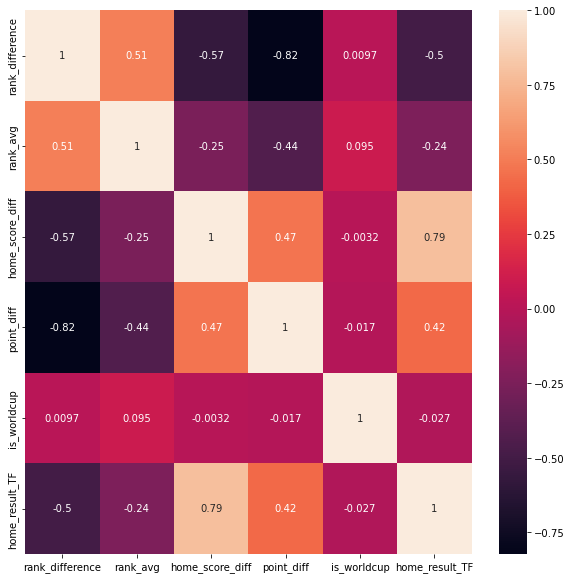

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
corr1 = w_l_outcome.corr()
corr2 = allmatchstats.corr()
sns.heatmap(corr1,annot=True)

<AxesSubplot:>

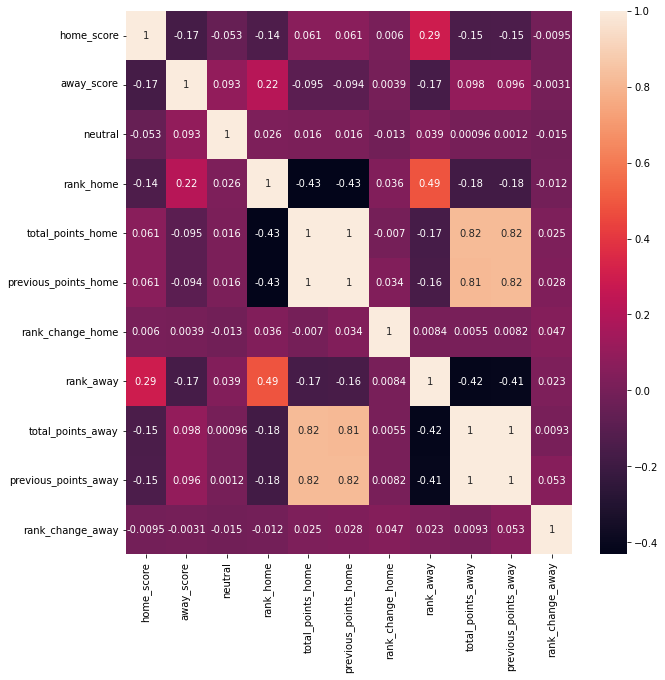

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
sns.heatmap(corr2,annot=True)

In [ ]:
w_l_outcome.describe()

,rank_difference,rank_avg,home_score_diff,point_diff
count,16284.000000,16284.000000,16284.000000,16284.000000
mean,-4.803611,77.554962,0.691845,19.859278
std,55.596279,52.908112,2.497603,282.021780
min,-209.000000,1.000000,-15.000000,-1757.000000
25%,-39.000000,32.000000,-1.000000,-93.000000
50%,-5.000000,71.000000,1.000000,9.000000
75%,28.000000,116.000000,2.000000,147.000000
max,210.000000,211.000000,31.000000,1592.000000


# Web scraping: top 50 players
Add information ranking how many top 50 players a team has

In [ ]:
import requests
from bs4 import BeautifulSoup

url = "https://www.espn.com/soccer/fifa-world-cup/story/4787456/world-cup-rank-the-50-best-footballers-of-qatar-2022"
response = requests.get(url)
if response.status_code == 200:
    print("Success")
else:
    print("Failure")
    
results_page = BeautifulSoup(response.content, 'lxml')

# Get names and position on top 50:
top_50 = {} 
for h2 in results_page.find_all('h2'):
    rank, name = h2.get_text().split('.')
    top_50[int(rank)] = [name[1:]]
    
# Add country:
n = 50
countries = []
for p in results_page.find_all('p'):
    #Check if it's the kind of p tag we are looking for:
    if p.find('b'): #does it have b tags?
        if p.find('b').get_text() == 'Country:': #is the first one Country?
            if p.find('a'): #does it have a tags?
                countries.append(p.find('a').get_text())
                top_50[n].append(p.find('a').get_text())
                n -= 1
            else:
                countries.append(p.get_text().split('\n')[0].split(' ')[1])
                top_50[n].append(p.get_text().split('\n')[0].split(' ')[1])
                n -= 1
                
# If there's only a link in Club, the algorithm will take the club as the country
# Only 3 (22, 35 and 37): fix them manualy
top_50[22][1] = 'England'
top_50[35][1] = 'England'
top_50[37][1] = 'France'

Point system: countries get n points for every player they have in the n position of the rank

In [ ]:
countries_points_2 = {}
for n, top in top_50.items():
    if top[1] in countries_points_2.keys(): #country already added 
        countries_points_2[top[1]] += n
    else: #country not added yet
        countries_points_2[top[1]] = n

In [ ]:
# Add columns with top_50 players info (home - away)
def puntuate_country (x):
    home = x['home_team']
    away = x['away_team']
    home = countries_points.get(home) if countries_points.get(home) else 0
    away = countries_points.get(away) if countries_points.get(away) else 0
    return home-away

countries_points = countries_points_3 #which punctuation method
#calculatedstats['top_50_diff'] = calculatedstats.apply(puntuate_country, axis=1)
#calculatedstats['top_50_diff'].unique()


# Modeling
* pipeline
* logistic regression 
* polynomial features
* random forest


### Polynomial Regression

In [ ]:
# determine X and y values (independent and dependent variables)
X, y = w_l_outcome[['rank_avg', 'rank_difference', 'point_diff','is_worldcup']], w_l_outcome['home_result_TF']

In [ ]:
# splits the data into train and testing groups 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=50)

/Users/atisaxena/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Performance on the Training set')

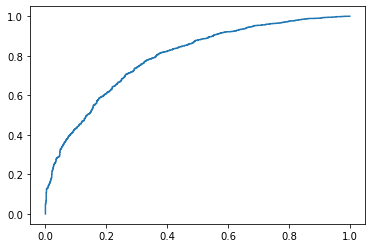

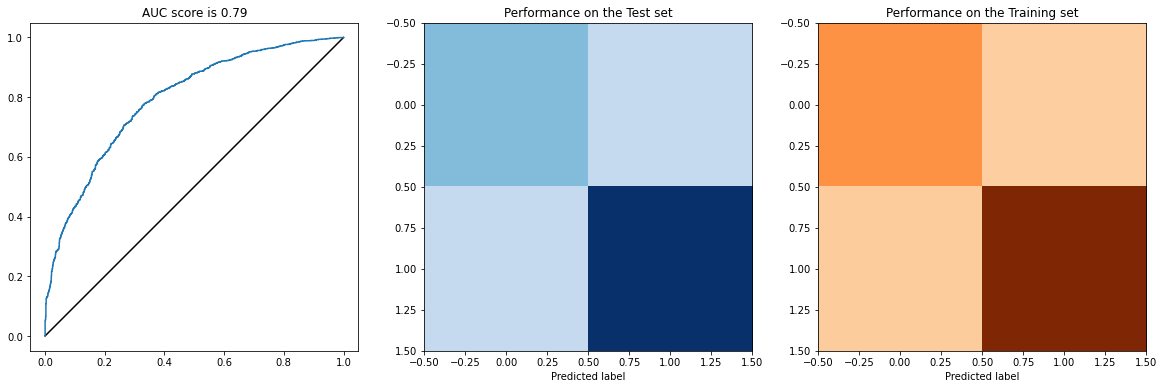

In [ ]:
from sklearn.metrics import roc_curve,auc
import pylab as pl
%matplotlib inline

# create a pipeline with two steps 
# first part of the Pipeline is to create a binomial distribution 
# second part of the Pipeline is to create a logistic regression 
model = Pipeline([
    ('polynomial_features', PolynomialFeatures(degree=2)), # binomial
    ('logistic_regression', linear_model.LogisticRegression(C=1e-5)) # logistic 
])


model = model.fit(X_train, y_train)

# use test set to test the model built from train set 
p_train = model.predict(X_train)
p_test = model.predict(X_test)
pp_test = model.predict_proba(X_test)[:,1]
pl.plot([0, 1], [0, 1], 'k') #This plots the random (equal probability line)
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.legend(loc="lower right")

fpr, tpr, thresholds = roc_curve(y_test, pp_test)
area = auc(fpr, tpr)
pl.clf() #Clear the current figure
pl.plot(fpr,tpr,label="Out-Sample ROC Curve with area = %1.2f"%area)


plt.figure(figsize=(20,10))
ax = plt.subplot(1,3,1)
ax.plot([0, 1], [0, 1], 'k')
ax.plot(fpr, tpr)
ax.set_title('AUC score is {0:0.2}'.format(roc_auc_score(y_test, pp_test)))
ax.set_aspect(1)

ax = plt.subplot(1,3,2)
confusionmatrix = confusion_matrix(y_test, p_test)
ax.imshow(confusionmatrix, cmap='Blues', clim = (0, confusionmatrix.max())) 

ax.set_xlabel('Predicted label')
ax.set_title('Performance on the Test set')

ax = plt.subplot(1,3,3)
confusionmatrix = confusion_matrix(y_train, p_train)
ax.imshow(confusionmatrix, cmap='Oranges', clim = (0, confusionmatrix.max())) 
ax.set_xlabel('Predicted label')
ax.set_title('Performance on the Training set')

Distribution overall for tournament games
True     0.658868
False    0.341132
Name: is_worldcup, dtype: float64


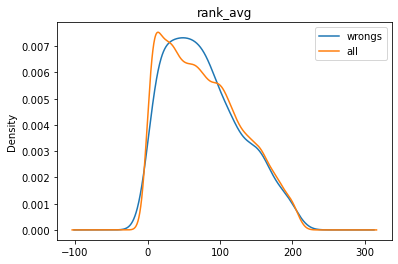

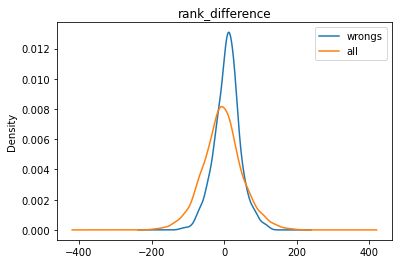

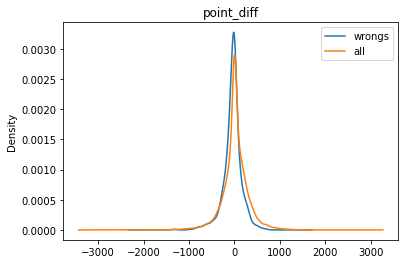

In [ ]:
features = ['rank_avg', 'rank_difference', 'point_diff']
wrongs = y_test != p_test

for feature in features:
    plt.figure()
    plt.title(feature)
    X_test.loc[wrongs, feature].plot.kde()
    X.loc[:, feature].plot.kde()
    plt.legend(['wrongs', 'all'])
    

print("Distribution overall for tournament games")
print(X['is_worldcup'].value_counts() / X.shape[0])

In [ ]:
print(wrongs.value_counts())
accuracypipeline = 1 - (843/2414)
accuracypipeline

False    2414
True      843
Name: home_result_TF, dtype: int64


0.6507870753935376

### Creating a Dummy Table

In [ ]:
dummies = pd.get_dummies(w_l_outcome)

## Random Forest from class example 

In [ ]:
from sklearn.ensemble import RandomForestClassifier

randomforestmodel = RandomForestClassifier(n_estimators=20)
#np.ravel flattens the pandas Series into an np array. That's what the classifier needs
randomforestmodel.fit(X_train,np.ravel(y_train))

RandomForestClassifier(n_estimators=20)

#### Accuracy of the Random Forest Model

In [ ]:
randomforestmodel.score(X_test,y_test)

0.7086275713847099

array([[ 656,  506],
       [ 443, 1652]])

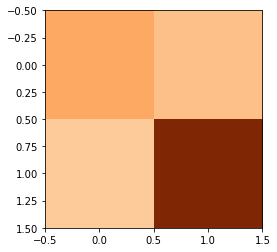

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = randomforestmodel.predict(X_test)
cfm = confusion_matrix(np.ravel(y_test),y_pred)

ax = plt.subplot(1,1,1)
ax.imshow(cfm, cmap='Oranges', clim = (0, cfm.max())) 

cfm

Distribution overall for tournament games
True     0.658868
False    0.341132
Name: is_worldcup, dtype: float64


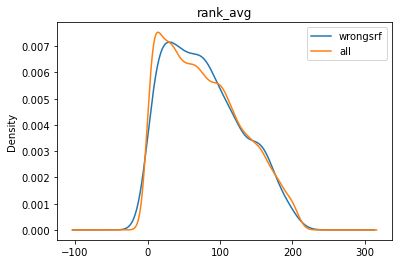

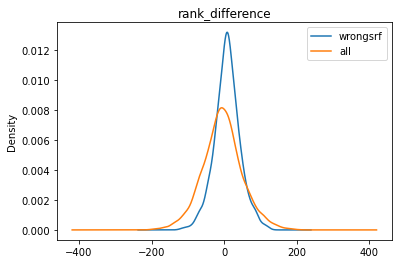

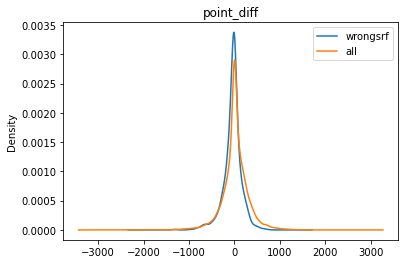

In [ ]:
features = ['rank_avg', 'rank_difference', 'point_diff']
wrongsrf = y_test != y_pred

for feature in features:
    plt.figure()
    plt.title(feature)
    X_test.loc[wrongsrf, feature].plot.kde()
    X.loc[:, feature].plot.kde()
    plt.legend(['wrongsrf', 'all'])
    

print("Distribution overall for tournament games")
print(X['is_worldcup'].value_counts() / X.shape[0])

Text(0.5, 0, 'Relative Importance')

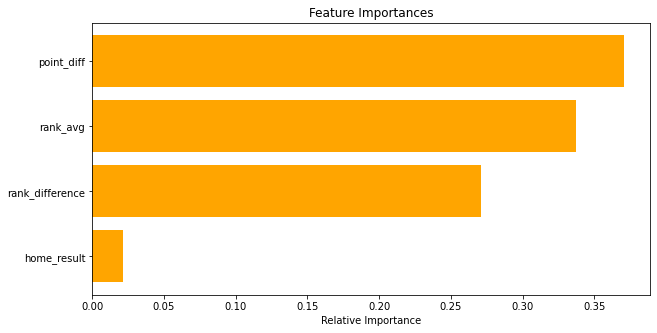

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

#feature_names = [key for key in w_l_outcome if not key=='home_result_TF']
feature_names = ['rank_difference','rank_avg','point_diff','home_result','is_worldcup']
importances = randomforestmodel.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(10,5))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='orange', align='center')
plt.yticks(range(len(indices)),np.array(feature_names)[indices])
plt.xlabel('Relative Importance')

# Round of 16 Simulations

* Netherlands vs. USA 
* Argentina vs. Australia 


* England vs. Senegal 
* France vs. Poland 




* Japan vs. Croatia 
* Brazil vs South Korea 



* Morocco vs. Spain 
* Portugal vs. Switzerland 

In [ ]:
r16teams = ['Netherlands', 'USA', 'Argentina', 'Australia', 'England', 'Senegal', 'France', 'Poland', 'Japan', 'Croatia', 'Brazil', 'Korea Republic', 'Morocco', 'Spain', 'Portugal', 'Switzerland']

In [ ]:
world_cup_rankings = rankings.loc[(rankings['rank_date'] == rankings['rank_date'].max()) & rankings['country_full'].isin(r16teams)]
world_cup_rankings['home'] = world_cup_rankings['country_full']
world_cup_rankings = world_cup_rankings.set_index(['country_full'])

/var/folders/xj/3xy_v_w504s32_3225pgf8zm0000gn/T/ipykernel_73024/252760802.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  world_cup_rankings['home'] = world_cup_rankings['country_full']


In [ ]:
r16dftotal = world_cup_rankings
r16dftotal['away'] = ['Australia', 'Argentina', 'Korea Republic', 'Japan', 'Senegal', 'Poland', 'Croatia', 'Brazil', 'Spain', 'USA', 'France', 'Switzerland', 'England', 'Morocco', 'Portugal', 'Netherlands']

In [ ]:
r16home = r16dftotal.loc[['Argentina', 'Netherlands', 'England', 'France', 'Japan', 'Brazil', 'Morocco', 'Portugal']]

In [ ]:
r16away = r16dftotal.loc[['Australia', 'USA', 'Senegal', 'Poland', 'Croatia', 'Korea Republic', 'Spain', 'Switzerland']]

In [ ]:
def run_r16_results(): 
    roundof16results = pd.DataFrame(([]), columns = ['home', 'away', 'pipeline home prob', 'rf home outcome', 'advances_pipeline', 'advances_rf'])
    homelist = []
    awaylist = []
    pipelinelist = []
    rflist = []


    pairings = []
    for i in range(0,8): 
        pair = (r16home['home'][i], r16home['away'][i])
        pairings.append(pair)
    
    for home,away in pairings:
        row = pd.DataFrame(np.array([[np.nan, np.nan, np.nan, True]]), columns=X_test.columns)
        home_rank = r16dftotal.loc[home, 'rank']
        home_points = r16dftotal.loc[home, 'total_points']
        away_rank = r16dftotal.loc[away, 'rank']
        away_points = r16dftotal.loc[away, 'total_points']
        row['rank_avg'] = (home_rank + away_rank) / 2
        row['rank_difference'] = home_rank - away_rank
        row['point_diff'] = home_points - away_points
    
        # logistic / binomial pipeline model
        home_win_prob_pipe = model.predict_proba(row)[:,1][0]
        away_win_prob_pipe = 1 - home_win_prob_pipe
    
        # random forest model
        rfhome_outcome = randomforestmodel.predict(row)
    
    
        # create data for results table
        homelist.append(home)
        awaylist.append(away)
        pipelinelist.append(home_win_prob_pipe)
        rflist.append(rfhome_outcome)
        
        
    roundof16results['team rank'] = r16home['rank'].values
    roundof16results['away rank'] = r16away['rank'].values
    
    roundof16results['home'] = homelist
    roundof16results['away'] = awaylist
    roundof16results['pipeline home prob'] = pipelinelist
    roundof16results['rf home outcome'] = rflist
    
    
    # determine who advances pipeline
    advances_pipeline = []
    for i in range(0,8):
        if roundof16results['pipeline home prob'][i] == .5:
            advances_pipeline.append('Draw')
        if roundof16results['pipeline home prob'][i] > .5:
            advances_pipeline.append(roundof16results['home'][i])
        if roundof16results['pipeline home prob'][i] < .5: 
            advances_pipeline.append(roundof16results['away'][i])

    # determine who advances random forest
    advances_rf = []
    for i in range(0,8):
        if roundof16results['rf home outcome'][i] == [True]:
            advances_rf.append(roundof16results['home'][i])
        else: 
            advances_rf.append(roundof16results['away'][i])
    
    roundof16results['advances_pipeline'] = advances_pipeline
    roundof16results['advances_rf'] = advances_rf
    
    
    return roundof16results
    
    

In [ ]:
roundof16results = run_r16_results()
roundof16results

,home,away,pipeline home prob,rf home outcome,advances_pipeline,advances_rf,team rank,away rank
0,Argentina,Australia,0.772712,[True],Argentina,Argentina,3.0,38.0
1,Netherlands,USA,0.575603,[True],Netherlands,Netherlands,8.0,16.0
2,England,Senegal,0.642831,[True],England,England,5.0,18.0
3,France,Poland,0.704380,[True],France,France,4.0,26.0
4,Japan,Croatia,0.426615,[False],Croatia,Croatia,24.0,12.0
5,Brazil,Korea Republic,0.769432,[True],Brazil,Brazil,1.0,28.0
6,Morocco,Spain,0.366236,[False],Spain,Spain,22.0,7.0
7,Portugal,Switzerland,0.551052,[True],Portugal,Portugal,9.0,15.0


# Quarterfinal Rounds

In [ ]:
qfpairs_pipeline = [[roundof16results['advances_pipeline'][0], roundof16results['advances_pipeline'][1]], 
                    [roundof16results['advances_pipeline'][2], roundof16results['advances_pipeline'][3]], 
                    [roundof16results['advances_pipeline'][4], roundof16results['advances_pipeline'][5]], 
                    [roundof16results['advances_pipeline'][6], roundof16results['advances_pipeline'][7]]]

In [ ]:
qfpairs_rf = [[roundof16results['advances_rf'][0], roundof16results['advances_rf'][1]], 
              [roundof16results['advances_rf'][2], roundof16results['advances_rf'][3]], 
              [roundof16results['advances_rf'][4], roundof16results['advances_rf'][5]], 
              [roundof16results['advances_rf'][6], roundof16results['advances_rf'][7]]]

In [ ]:
participants_pipeline = sum(qfpairs_pipeline, [])
participants_rf = sum(qfpairs_rf, [])

In [ ]:
qftotal_pipeline = r16dftotal.loc[participants_pipeline]
qftotal_rf = r16dftotal.loc[participants_rf]

In [ ]:
qftotal_pipeline = qftotal_pipeline.drop('away', axis =1)
qftotal_rf = qftotal_rf.drop('away', axis =1)

In [ ]:
even = np.arange(0,8,2)
odd = np.arange(1,8,2)

In [ ]:
qfhome_pipeline = qftotal_pipeline.iloc[even]
qfhome_rf = qftotal_rf.iloc[even]

qfaway_pipeline = qftotal_pipeline.iloc[odd]
qfaway_rf = qftotal_rf.iloc[odd]

In [ ]:
def run_qf_results(qftotal, qfhome, qfaway): 
    qfresults = pd.DataFrame(([]), columns = ['home', 'away', 'pipeline home prob', 'rf home outcome', 'advances_pipeline', 'advances_rf'])
    homelist = []
    awaylist = []
    pipelinelist = []
    rflist = []


    pairings = []
    for i in range(0,4): 
        pair = (qfhome['home'][i], qfaway['home'][i])
        pairings.append(pair)
    
    for home,away in pairings:
        row = pd.DataFrame(np.array([[np.nan, np.nan, np.nan, True]]), columns=X_test.columns)
        home_rank = qftotal.loc[home, 'rank']
        home_points = qftotal.loc[home, 'total_points']
        away_rank = qftotal.loc[away, 'rank']
        away_points = qftotal.loc[away, 'total_points']
        row['rank_avg'] = (home_rank + away_rank) / 2
        row['rank_difference'] = home_rank - away_rank
        row['point_diff'] = home_points - away_points
    
        # logistic / binomial pipeline model
        home_win_prob_pipe = model.predict_proba(row)[:,1][0]
        away_win_prob_pipe = 1 - home_win_prob_pipe
    
        # random forest model
        rfhome_outcome = randomforestmodel.predict(row)
    
    
        # create data for results table
        homelist.append(home)
        awaylist.append(away)
        pipelinelist.append(home_win_prob_pipe)
        rflist.append(rfhome_outcome)
        
    qfresults['home'] = homelist
    qfresults['away'] = awaylist
    qfresults['pipeline home prob'] = pipelinelist
    qfresults['rf home outcome'] = rflist
    
    # determine who advances pipeline
    advances_pipeline = []
    for i in range(0,4):
        if qfresults['pipeline home prob'][i] == .5:
            advances_pipeline.append('Draw')
        if qfresults['pipeline home prob'][i] > .5:
            advances_pipeline.append(qfresults['home'][i])
        if qfresults['pipeline home prob'][i] < .5: 
            advances_pipeline.append(qfresults['away'][i])

    # determine who advances random forest
    advances_rf = []
    for i in range(0,4):
        if qfresults['rf home outcome'][i] == [True]:
            advances_rf.append(qfresults['home'][i])
        else: 
            advances_rf.append(qfresults['away'][i])
        
    qfresults['advances_pipeline'] = advances_pipeline
    qfresults['advances_rf'] = advances_rf
    
    return qfresults
        

In [ ]:
# results from round of 16 using teams generated through pipeline
qf_results_pipeline = run_qf_results(qftotal_pipeline, qfhome_pipeline, qfaway_pipeline)

# results from round of 16 using teams generated through rf 
qf_results_rf = run_qf_results(qftotal_rf, qfhome_rf, qfaway_rf)


In [ ]:
qf_results_pipeline

,home,away,pipeline home prob,rf home outcome,advances_pipeline,advances_rf
0,Argentina,Netherlands,0.579723,[True],Argentina,Argentina
1,England,France,0.473070,[False],France,France
2,Croatia,Brazil,0.321081,[True],Brazil,Croatia
3,Spain,Portugal,0.541825,[False],Spain,Portugal


In [ ]:
qf_results_rf

,home,away,pipeline home prob,rf home outcome,advances_pipeline,advances_rf
0,Argentina,Netherlands,0.579723,[True],Argentina,Argentina
1,England,France,0.473070,[False],France,France
2,Croatia,Brazil,0.321081,[True],Brazil,Croatia
3,Spain,Portugal,0.541825,[False],Spain,Portugal


# Semifinal Rounds

#### Results from Quarterfinal Simulation Using Pipeline Model

In [ ]:
sfpairs_pipe_pipe = [[qf_results_pipeline['advances_pipeline'][0], 
                      qf_results_pipeline['advances_pipeline'][1]], 
                     [qf_results_pipeline['advances_pipeline'][2], 
                      qf_results_pipeline['advances_pipeline'][3]]]

sfpairs_pipe_rf = [[qf_results_pipeline['advances_rf'][0], 
                      qf_results_pipeline['advances_rf'][1]], 
                     [qf_results_pipeline['advances_rf'][2], 
                      qf_results_pipeline['advances_rf'][3]]]

In [ ]:
participants_pipe_pipe = sum(sfpairs_pipe_pipe, [])
participants_pipe_rf = sum(sfpairs_pipe_rf, [])

In [ ]:
sftotal_pipe_pipe = qftotal_pipeline.loc[participants_pipe_pipe]
sftotal_pipe_rf = qftotal_pipeline.loc[participants_pipe_rf]

In [ ]:
even = np.arange(0,4,2)
odd = np.arange(1,4,2)

In [ ]:
sfhome_pipe_pipe = sftotal_pipe_pipe.iloc[even]
sfhome_pipe_rf = sftotal_pipe_rf.iloc[even]

sfaway_pipe_pipe = sftotal_pipe_pipe.iloc[odd]
sfaway_pipe_rf = sftotal_pipe_rf.iloc[odd]

#### Results from Quarterfinal Simulation Using Random Forest Model

In [ ]:
sfpairs_rf_pipe = [[qf_results_rf['advances_pipeline'][0], 
                      qf_results_rf['advances_pipeline'][1]], 
                     [qf_results_rf['advances_pipeline'][2], 
                      qf_results_rf['advances_pipeline'][3]]]

sfpairs_rf_rf = [[qf_results_rf['advances_rf'][0], 
                      qf_results_rf['advances_rf'][1]], 
                     [qf_results_rf['advances_rf'][2], 
                      qf_results_rf['advances_rf'][3]]]

In [ ]:
participants_rf_pipe = sum(sfpairs_rf_pipe, [])
participants_rf_rf = sum(sfpairs_rf_pipe, [])

In [ ]:
sftotal_rf_pipe = qftotal_rf.loc[participants_rf_pipe]
sftotal_rf_rf = qftotal_rf.loc[participants_rf_rf]

In [ ]:
sfhome_rf_pipe = sftotal_rf_pipe.iloc[even]
sfhome_rf_rf = sftotal_rf_rf.iloc[even]

sfaway_rf_pipe = sftotal_rf_pipe.iloc[odd]
sfaway_rf_rf = sftotal_rf_rf.iloc[odd]

#### Defining the Semifinal Function

In [ ]:
def run_sf_results(sftotal, sfhome, sfaway): 
    sfresults = pd.DataFrame(([]), columns = ['home', 'away', 'pipeline home prob', 'rf home outcome', 'advances_pipeline', 'advances_rf'])
    homelist = []
    awaylist = []
    pipelinelist = []
    rflist = []


    pairings = []
    for i in range(0,2): 
        pair = (sfhome['home'][i], sfaway['home'][i])
        pairings.append(pair)
    
    for home,away in pairings:
        row = pd.DataFrame(np.array([[np.nan, np.nan, np.nan, True]]), columns=X_test.columns)
        home_rank = sftotal.loc[home, 'rank']
        home_points = sftotal.loc[home, 'total_points']
        away_rank = sftotal.loc[away, 'rank']
        away_points = sftotal.loc[away, 'total_points']
        row['rank_avg'] = (home_rank + away_rank) / 2
        row['rank_difference'] = home_rank - away_rank
        row['point_diff'] = home_points - away_points
    
        # logistic / binomial pipeline model
        home_win_prob_pipe = model.predict_proba(row)[:,1][0]
        away_win_prob_pipe = 1 - home_win_prob_pipe
    
        # random forest model
        rfhome_outcome = randomforestmodel.predict(row)
    
    
        # create data for results table
        homelist.append(home)
        awaylist.append(away)
        pipelinelist.append(home_win_prob_pipe)
        rflist.append(rfhome_outcome)
        
    sfresults['home'] = homelist
    sfresults['away'] = awaylist
    sfresults['pipeline home prob'] = pipelinelist
    sfresults['rf home outcome'] = rflist
        
    
    
    # determine who advances pipeline
    advances_pipeline = []
    for i in range(0,2):
        if sfresults['pipeline home prob'][i] == .5:
            advances_pipeline.append('Draw')
        if sfresults['pipeline home prob'][i] > .5:
            advances_pipeline.append(sfresults['home'][i])
        if sfresults['pipeline home prob'][i] < .5: 
            advances_pipeline.append(sfresults['away'][i])

    # determine who advances random forest
    advances_rf = []
    for i in range(0,2):
        if sfresults['rf home outcome'][i] == [True]:
            advances_rf.append(sfresults['home'][i])
        else: 
            advances_rf.append(sfresults['away'][i])
        
    sfresults['advances_pipeline'] = advances_pipeline
    sfresults['advances_rf'] = advances_rf
    
    return sfresults
        

In [ ]:
sf_results_pipe_pipe = run_sf_results(sftotal_pipe_pipe, sfhome_pipe_pipe, sfaway_pipe_pipe)
sf_results_pipe_rf = run_sf_results(sftotal_pipe_rf, sfhome_pipe_rf, sfaway_pipe_rf)
sf_results_rf_pipe = run_sf_results(sftotal_rf_pipe, sfhome_rf_pipe, sfaway_rf_pipe)
sf_results_rf_rf = run_sf_results(sftotal_rf_rf, sfhome_rf_rf, sfaway_rf_rf)

In [ ]:
sf_results_pipe_pipe

,home,away,pipeline home prob,rf home outcome,advances_pipeline,advances_rf
0,Argentina,France,0.516327,[True],Argentina,Argentina
1,Brazil,Spain,0.621241,[True],Brazil,Brazil


In [ ]:
sf_results_pipe_rf

,home,away,pipeline home prob,rf home outcome,advances_pipeline,advances_rf
0,Argentina,France,0.516327,[True],Argentina,Argentina
1,Croatia,Portugal,0.476934,[True],Portugal,Croatia


In [ ]:
sf_results_rf_pipe

,home,away,pipeline home prob,rf home outcome,advances_pipeline,advances_rf
0,Argentina,France,0.516327,[True],Argentina,Argentina
1,Brazil,Spain,0.621241,[True],Brazil,Brazil


In [ ]:
sf_results_rf_rf 

,home,away,pipeline home prob,rf home outcome,advances_pipeline,advances_rf
0,Argentina,France,0.516327,[True],Argentina,Argentina
1,Brazil,Spain,0.621241,[True],Brazil,Brazil


# World Cup Final

##### Pipeline x Pipeline Model 

In [ ]:
finalpair_pipex3 = [sf_results_pipe_pipe['advances_pipeline'][0], 
                      sf_results_pipe_pipe['advances_pipeline'][1]]
finalpair_pipex2_rf = [sf_results_pipe_pipe['advances_rf'][0], 
                      sf_results_pipe_pipe['advances_rf'][1]]

In [ ]:
finaltotal_pipex3 = sftotal_pipe_pipe.loc[finalpair_pipex3]
finalhome_pipex3 = finaltotal_pipex3[:1]
finalaway_pipex3 = finaltotal_pipex3[1:]


finaltotal_pipex2_rf = sftotal_pipe_pipe.loc[finalpair_pipex3]
finalhome_pipex2_rf = finaltotal_pipex2_rf[:1]
finalaway_pipex2_rf = finaltotal_pipex2_rf[1:]

##### Pipeline x Random Forest Model 

In [ ]:
finalpair_pipe_rf_pipe = [sf_results_pipe_rf['advances_pipeline'][0], 
                      sf_results_pipe_rf['advances_pipeline'][1]]
finalpair_pipe_rfx2 = [sf_results_pipe_rf['advances_rf'][0], 
                      sf_results_pipe_rf['advances_rf'][1]]

In [ ]:
finaltotal_pipe_rf_pipe = sftotal_pipe_rf.loc[finalpair_pipe_rf_pipe]
finalhome_pipe_rf_pipe = finaltotal_pipe_rf_pipe[:1]
finalaway_pipe_rf_pipe = finaltotal_pipe_rf_pipe[1:]


finaltotal_pipe_rfx2 = sftotal_pipe_rf.loc[finalpair_pipe_rfx2]
finalhome_pipe_rfx2 = finaltotal_pipe_rfx2[:1]
finalaway_pipe_rfx2 = finaltotal_pipe_rfx2[1:]

##### Random Forest x Pipeline Model

In [ ]:
finalpair_rf_pipex2 = [sf_results_rf_pipe['advances_pipeline'][0], 
                      sf_results_rf_pipe['advances_pipeline'][1]]
finalpair_rf_pipe_rf = [sf_results_rf_pipe['advances_rf'][0], 
                      sf_results_rf_pipe['advances_rf'][1]]

In [ ]:
finaltotal_rf_pipex2 = sftotal_rf_pipe.loc[finalpair_rf_pipex2]
finalhome_rf_pipex2 = finaltotal_rf_pipex2[:1]
finalaway_rf_pipex2 = finaltotal_rf_pipex2[1:]


finaltotal_rf_pipe_rf = sftotal_rf_pipe.loc[finalpair_rf_pipe_rf]
finalhome_rf_pipe_rf = finaltotal_rf_pipe_rf[:1]
finalaway_rf_pipe_rf = finaltotal_rf_pipe_rf[1:]

##### Random Forest x Random Forest Model

In [ ]:
finalpair_rfx2_pipe = [sf_results_rf_rf['advances_pipeline'][0], 
                      sf_results_rf_rf['advances_pipeline'][1]]
finalpair_rfx3 = [sf_results_rf_rf['advances_rf'][0], 
                      sf_results_rf_rf['advances_rf'][1]]

In [ ]:
finaltotal_rfx2_pipe = sftotal_rf_rf.loc[finalpair_rfx2_pipe]
finalhome_rfx2_pipe = finaltotal_rfx2_pipe[:1]
finalaway_rfx2_pipe = finaltotal_rfx2_pipe[1:]

finaltotal_rfx3 = sftotal_rf_rf.loc[finalpair_rfx3]
finalhome_rfx3 = finaltotal_rfx3[:1]
finalaway_rfx3 = finaltotal_rfx3[1:]

#### Defining the Final Function

In [ ]:
def run_final_results(finaltotal, finalhome, finalaway): 
    finalresults = pd.DataFrame(([]), columns = ['home', 'away', 'pipeline home prob', 'rf home outcome', 'winner_pipeline', 'winner_rf'])
    homelist = []
    awaylist = []
    pipelinelist = []
    rflist = []

    home = finalhome['home'][0]
    away = finalaway['home'][0]
    pairing = [home, away]
        
    #for home,away in pairing:
    row = pd.DataFrame(np.array([[np.nan, np.nan, np.nan, True]]), columns=X_test.columns)
    home_rank = finaltotal.loc[home, 'rank']
    home_points = finaltotal.loc[home, 'total_points']
    away_rank = finaltotal.loc[away, 'rank']
    away_points = finaltotal.loc[away, 'total_points']
    row['rank_avg'] = (home_rank + away_rank) / 2
    row['rank_difference'] = home_rank - away_rank
    row['point_diff'] = home_points - away_points
    
    # logistic / binomial pipeline model
    home_win_prob_pipe = model.predict_proba(row)[:,1][0]
    away_win_prob_pipe = 1 - home_win_prob_pipe
    
    # random forest model
    rfhome_outcome = randomforestmodel.predict(row)  

    # create data for results table
    homelist.append(home)
    awaylist.append(away)
    pipelinelist.append(home_win_prob_pipe)
    rflist.append(rfhome_outcome)
        
    finalresults['home'] = homelist
    finalresults['away'] = awaylist
    finalresults['pipeline home prob'] = pipelinelist
    finalresults['rf home outcome'] = rflist
    
    # determine who advances pipeline
    advances_pipeline = []
    if finalresults['pipeline home prob'][0] == .5:
        advances_pipeline.append('Draw')
    if finalresults['pipeline home prob'][0] > .5:
        advances_pipeline.append(finalresults['home'][0])
    if finalresults['pipeline home prob'][0] < .5: 
        advances_pipeline.append(finalresults['away'][0])

    # determine who advances random forest
    advances_rf = []
    if finalresults['rf home outcome'][0] == [True]:
        advances_rf.append(finalresults['home'][0])
    else: 
        advances_rf.append(finalresults['away'][0])
        
    finalresults['winner_pipeline'] = advances_pipeline
    finalresults['winner_rf'] = advances_rf
    
    return finalresults
        

# World Cup Winner

##### Pipeline x Pipeline x Pipeline

In [ ]:
finalresults_pipex3 = run_final_results(finaltotal_pipex3, 
                                        finalhome_pipex3, 
                                        finalaway_pipex3)

##### Pipeline x Pipeline x Random Forest 

In [ ]:
finalresults_pipex2_rf = run_final_results(finaltotal_pipex2_rf, 
                                           finalhome_pipex2_rf, 
                                           finalaway_pipex2_rf)

##### Pipeline x Random Forest x Pipeline

In [ ]:
finalresults_pipe_rf_pipe = run_final_results(finaltotal_pipe_rf_pipe, 
                                           finalhome_pipe_rf_pipe, 
                                           finalaway_pipe_rf_pipe)

##### Pipeline x Random Forest x Random Forest

In [ ]:
finalresults_pipe_rfx2 = run_final_results(finaltotal_pipe_rfx2, 
                                           finalhome_pipe_rfx2, 
                                           finalaway_pipe_rfx2)

##### Random Forest x Pipeline x Pipeline

In [ ]:
finalresults_rf_pipex2 = run_final_results(finaltotal_rf_pipex2, 
                                           finalhome_rf_pipex2, 
                                           finalaway_rf_pipex2)

##### Random Forest x Pipeline x Random Forest 

In [ ]:
finalresults_rf_pipe_rf = run_final_results(finaltotal_rf_pipe_rf, 
                                           finalhome_rf_pipe_rf, 
                                           finalaway_rf_pipe_rf)

#####  Random Forest x Random Forest x Pipeline

In [ ]:
finalresults_rfx2_pipe = run_final_results(finaltotal_rfx2_pipe, 
                                           finalhome_rfx2_pipe, 
                                           finalaway_rfx2_pipe)

##### Random Forest x Random Forest x Random Forest 

In [ ]:
finalresults_rfx3 = run_final_results(finaltotal_rfx3, 
                                           finalhome_rfx3, 
                                           finalaway_rfx3)

# World Cup Winner Data Frame

In [ ]:
index = ['pipex3', 'pipex2_rf', 'pipe_rf_pipe', 'pipe_rfx2', 'rf_pipex2', 
         'rf_pipe_rf','rfx2_pipe', 'rfx3']

In [ ]:
finaldf = pd.concat([finalresults_pipex3, finalresults_pipex2_rf, 
                    finalresults_pipe_rf_pipe, finalresults_pipe_rfx2,
                    finalresults_rf_pipex2, finalresults_rf_pipe_rf, 
                    finalresults_rfx2_pipe, finalresults_rfx3]) 

In [ ]:
finaldf['model'] = index

In [ ]:
finaldf = finaldf.set_index('model')

In [ ]:
finaldf

,home,away,pipeline home prob,rf home outcome,winner_pipeline,winner_rf
model,,,,,,
pipex3,Argentina,Brazil,0.435577,[True],Brazil,Argentina
pipex2_rf,Argentina,Brazil,0.435577,[True],Brazil,Argentina
pipe_rf_pipe,Argentina,Portugal,0.596284,[False],Argentina,Portugal
pipe_rfx2,Argentina,Croatia,0.625126,[True],Argentina,Argentina
rf_pipex2,Argentina,Brazil,0.435577,[True],Brazil,Argentina
rf_pipe_rf,Argentina,Brazil,0.435577,[True],Brazil,Argentina
rfx2_pipe,Argentina,Brazil,0.435577,[True],Brazil,Argentina
rfx3,Argentina,Brazil,0.435577,[True],Brazil,Argentina
